# Semiconductor dopant screening

## Application to titanium dioxide

In [1]:
from smact.dopant_prediction.doper import Doper

/home/antobi/miniconda3/envs/smact_dev/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The Doper module includes `get_dopants` function. These require an input (tuple(str)), which is formed by the ionic species of the material.

By default, the top five p-type and n-type candidates are reported. Use `num_dopants` input to modify the number of outputs.

The output format:

(dict): Dopant suggestions, given as a dictionary with keys "n_type_cation", "p_type_cation", "n_type_anion", "p_type_anion".

Each key contains a list of possible dopants in the order of probability (Highest --> Lowest).

Each possible dopant is represented with tuple: ('substituted dopant', 'original specie', 'probability') 

In [2]:
material = Doper(("Ti4+", "O2-"))
material.get_dopants()

# 15 possible dopants
material.get_dopants(15)

{'n-type cation substitutions': [('Ta5+', 'Ti4+', 8.790371775858281e-05),
  ('Nb5+', 'Ti4+', 7.830035204694342e-05),
  ('Sb5+', 'Ti4+', 6.259166355036722e-05),
  ('Ru5+', 'Ti4+', 4.904126561555437e-05),
  ('Re5+', 'Ti4+', 4.546178573532138e-05),
  ('Ir5+', 'Ti4+', 3.4652057352167286e-05),
  ('W6+', 'Ti4+', 3.4638026110457894e-05),
  ('Bi5+', 'Ti4+', 1.9582397953056897e-05),
  ('Mo6+', 'Ti4+', 1.6924395455176864e-05),
  ('Te6+', 'Ti4+', 1.4299724897106019e-05),
  ('U5+', 'Ti4+', 1.4299724897106019e-05),
  ('U6+', 'Ti4+', 1.4299724897106019e-05),
  ('As5+', 'Ti4+', 1.1731025674408029e-05),
  ('I5+', 'Ti4+', 9.377039539879602e-06),
  ('P5+', 'Ti4+', 9.37392687948258e-06)],
 'p-type cation substitutions': [('Na1+', 'Ti4+', 0.00010060400812977031),
  ('Zn2+', 'Ti4+', 8.56373996146833e-05),
  ('Mn2+', 'Ti4+', 8.563568688381837e-05),
  ('Mg2+', 'Ti4+', 6.777016806765154e-05),
  ('Fe3+', 'Ti4+', 6.259479321178562e-05),
  ('Ca2+', 'Ti4+', 5.5340892351269824e-05),
  ('Ni2+', 'Ti4+', 5.5340338945

Ternary and multicomponent systems can also be tested.

In [3]:
quaternary = Doper(("Cu1+", "Zn2+", "Ge4+", "S2-"))
quaternary.get_dopants()

{'n-type cation substitutions': [('Si4+', 'Ge4+', 0.0008777853600526021),
  ('Co2+', 'Zn2+', 0.00038676299875561366),
  ('Cd2+', 'Zn2+', 0.00034479571082730946),
  ('Mg2+', 'Zn2+', 0.00034293540270251613),
  ('Mn2+', 'Zn2+', 0.00033249741948425897)],
 'p-type cation substitutions': [('Ag1+', 'Cu1+', 0.0004187742948950742),
  ('Co2+', 'Zn2+', 0.00038676299875561366),
  ('Cd2+', 'Zn2+', 0.00034479571082730946),
  ('Mg2+', 'Zn2+', 0.00034293540270251613),
  ('Mn2+', 'Zn2+', 0.00033249741948425897)],
 'n-type anion substitutions': [('Cl1-', 'S2-', 0.000708721114826238),
  ('F1-', 'S2-', 0.00021217514709258802),
  ('H1-', 'S2-', 9.31310255126729e-08),
  ('C1-', 'S2-', 9.31310255126729e-08),
  ('N1-', 'S2-', 9.31310255126729e-08)],
 'p-type anion substitutions': [('N3-', 'S2-', 0.0007862635952461277),
  ('C4-', 'S2-', 9.31310255126729e-08),
  ('C3-', 'S2-', 9.31310255126729e-08),
  ('Si4-', 'S2-', 9.31310255126729e-08),
  ('Si3-', 'S2-', 9.31310255126729e-08)]}

If you want to plot the results in the form of heatmap, use `plot_dopants` method.

`num_dopants` input can also be used.

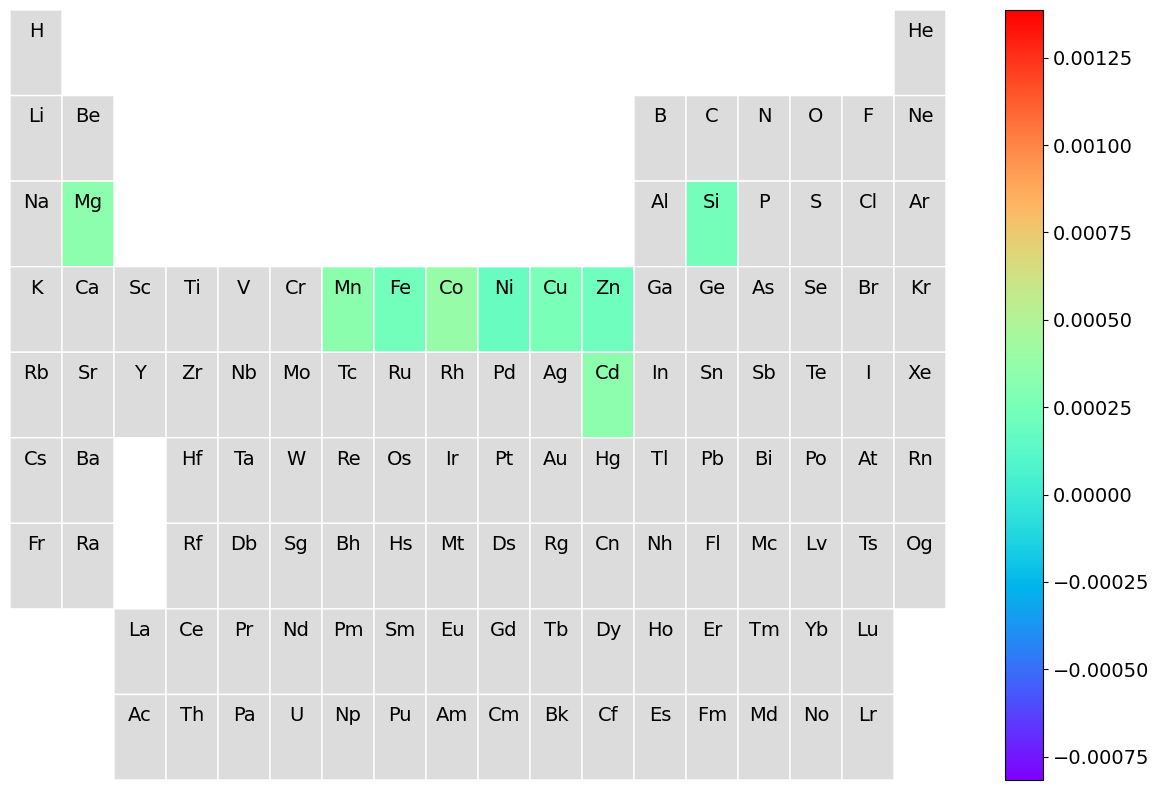

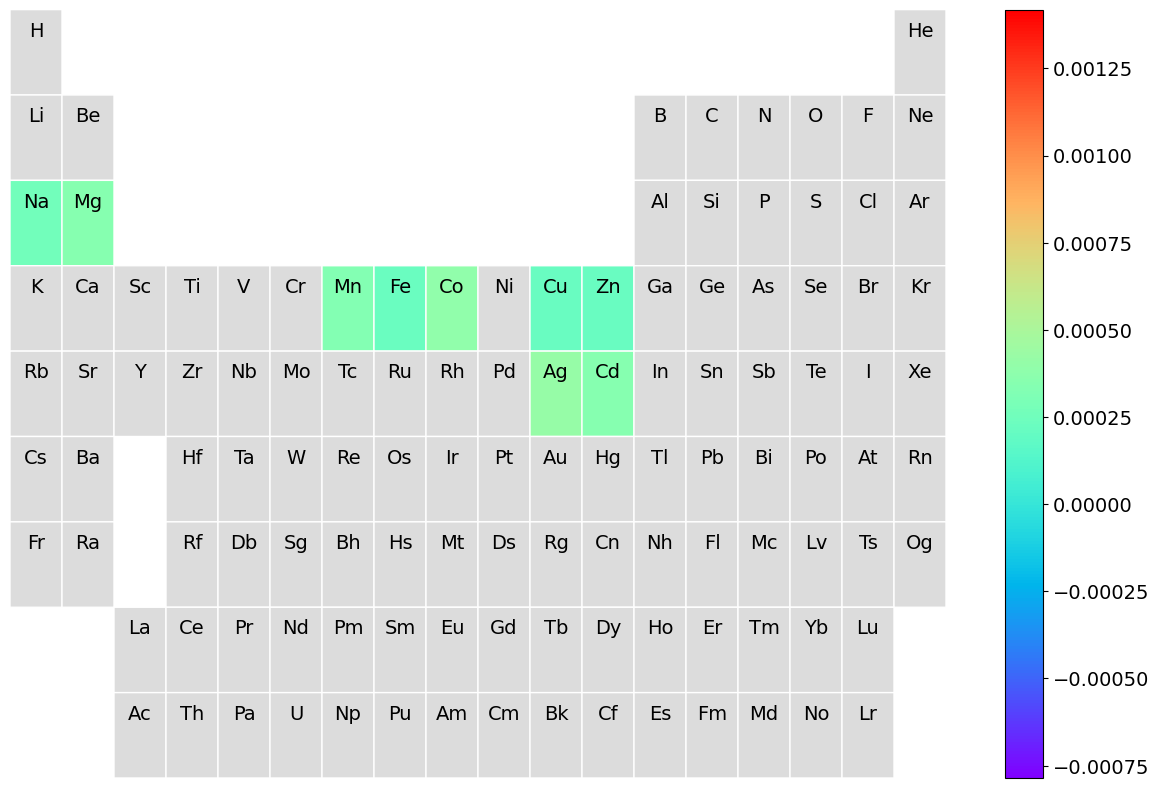

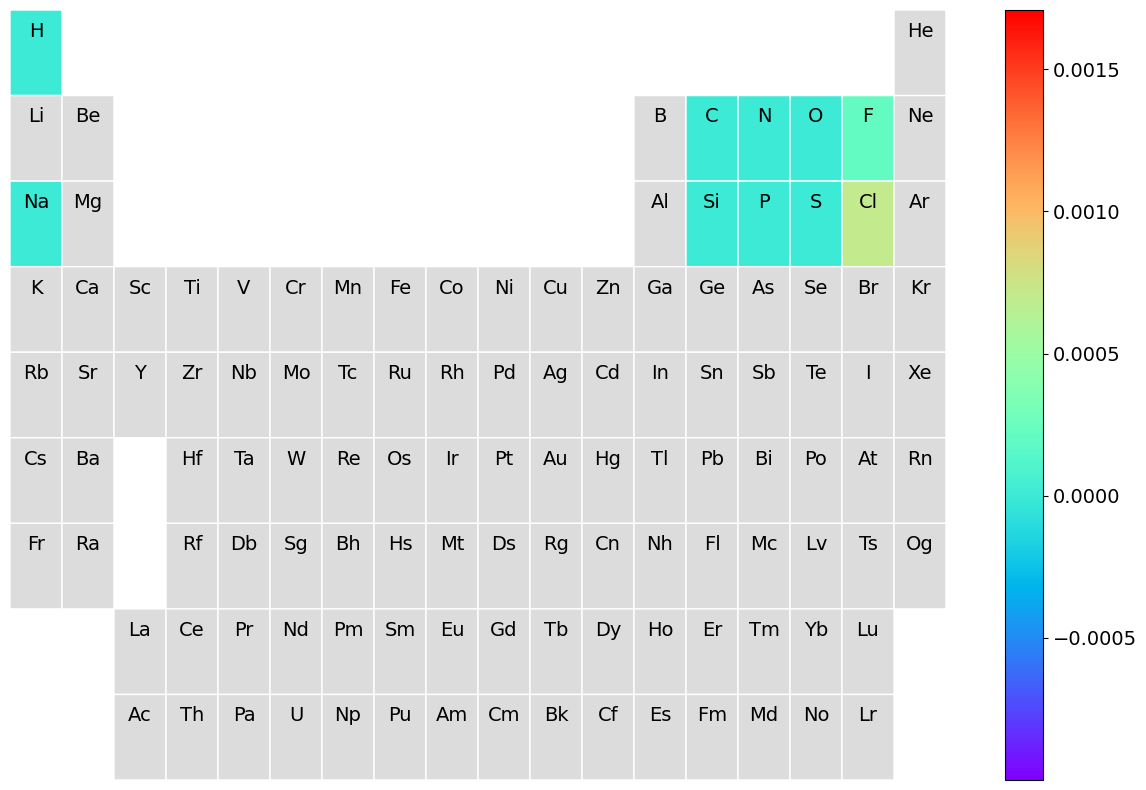

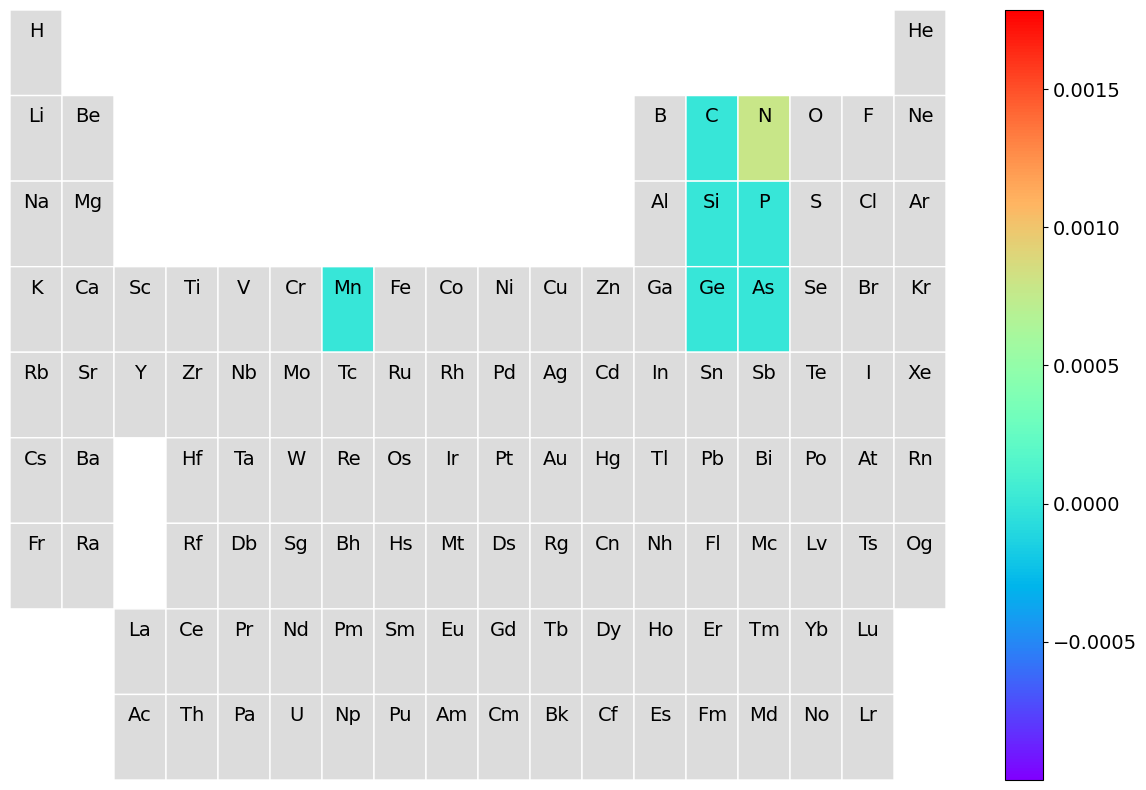

In [4]:
quaternary.plot_dopants(10)